**Naive Bayes Classifier**

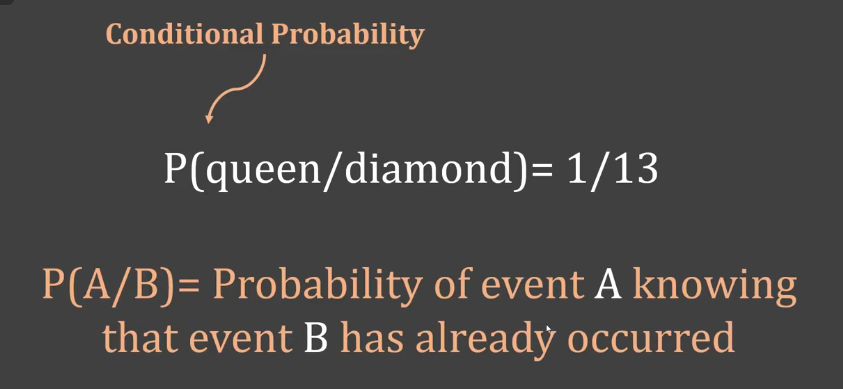

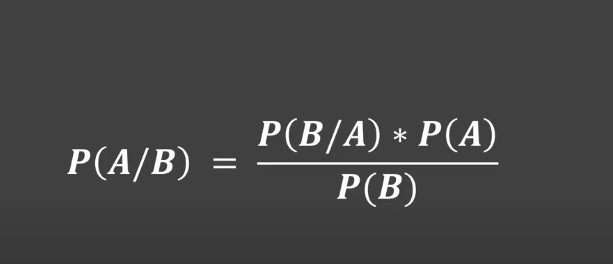

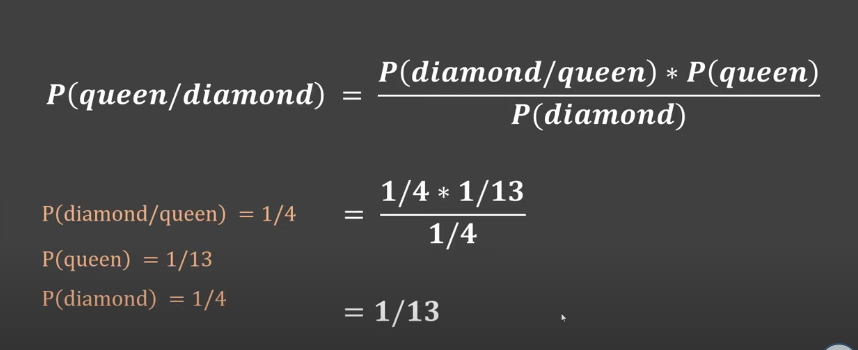

In [148]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [149]:
df.drop(['PassengerId', 'Name', 'SibSp','Parch','Ticket','Cabin', 'Embarked'], axis = 'columns', inplace=True)
df.head(5)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [150]:
target = df.Survived
inputs = df.drop(['Survived'], axis = 'columns')

In [151]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [152]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [153]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [154]:
inputs = pd.concat([inputs, dummies], axis = 'columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [155]:
inputs.drop(['Sex'], axis='columns', inplace = True)

In [156]:
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,NaN,8.4583,False,True


In [157]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [158]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [159]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(5)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [161]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [162]:
model.fit(X_train, y_train)

GaussianNB()

In [163]:
model.score(X_test, y_test)

0.8100558659217877

In [164]:
X_test[:10]

,Pclass,Age,Fare,female,male
428,3,29.699118,7.7500,False,True
1,1,38.000000,71.2833,True,False
150,2,51.000000,12.5250,False,True
195,1,58.000000,146.5208,True,False
3,1,35.000000,53.1000,True,False
786,3,18.000000,7.4958,True,False
788,3,1.000000,20.5750,False,True
67,3,19.000000,8.1583,False,True
831,2,0.830000,18.7500,False,True
313,3,28.000000,7.8958,False,True


In [165]:
y_test[:10]

428    0
1      1
150    0
195    1
3      1
786    1
788    1
67     0
831    1
313    0
Name: Survived, dtype: int64

In [166]:
model.predict(X_test[:10])

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [167]:
model.predict_proba(X_test[:10])

array([[9.89136054e-01, 1.08639465e-02],
       [3.75927337e-03, 9.96240727e-01],
       [9.71099777e-01, 2.89002234e-02],
       [1.68959998e-05, 9.99983104e-01],
       [7.05503488e-03, 9.92944965e-01],
       [7.83979437e-02, 9.21602056e-01],
       [9.79591059e-01, 2.04089409e-02],
       [9.87811403e-01, 1.21885969e-02],
       [9.54772500e-01, 4.52274998e-02],
       [9.89042350e-01, 1.09576499e-02]])